<a href="https://colab.research.google.com/github/AnqingHu/AnqingHu.github.io/blob/main/Assignment1_Anqing_for_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 1

In [134]:
import pandas as pd #first we'll need module pandas to work with the dataframes
%matplotlib inline

## Dataset 1. The 311 service requests (CSV) in Boston

The data contains all 311 call service requests, including their time, location, type of issue and many other details

Source https://data.boston.gov/dataset/311-service-requests

In [135]:
#lets specify the file location on the web
#we can actually upload the data directly from there!
#the data is provided by year, so consider the most recent full year available - 2019
fname = '311_service_requests_2020.csv'
url = 'https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpxbo51van.csv'

In [136]:
boston311 = pd.read_csv(url) #upload the data

<ipython-input-136-fd8216af2dca>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  boston311 = pd.read_csv(url) #upload the data


In [137]:
#preview the data
boston311.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101003148265,2020-01-01 00:07:00,2020-01-13 03:30:00,2020-01-20 06:43:10,OVERDUE,Closed,Case Closed. Closed date : 2020-01-20 11:43:10...,Park Lights - Doherty Playground (BPRD),Parks & Recreation Department,Park Maintenance & Safety,...,Charlestown,2,2,0207,INTERSECTION S Quincy Pl & Saint Martin St,NaN,42.382987,-71.067828,0101000020E6100000ADA5774957C451C01A77A6B30531...,Citizens Connect App
1,101003148266,2020-01-01 00:54:48,2020-01-01 00:54:48,2020-01-02 01:11:49,OVERDUE,Closed,Case Closed. Closed date : 2020-01-02 06:11:49...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Dorchester,8,Ward 17,1702,85 Bloomfield St,2124.0,42.298900,-71.069541,0101000020E6100000E9E56F5A73C451C07E7212574226...,Citizens Connect App
2,101003148268,2020-01-01 01:14:13,2020-01-03 03:30:00,2020-01-01 10:05:46,ONTIME,Closed,Case Closed. Closed date : 2020-01-01 15:05:46...,Requests for Street Cleaning,Public Works Department,Street Cleaning,...,South End,6,Ward 9,0901,423 Shawmut Ave,2118.0,42.340130,-71.074291,0101000020E6100000E2300A2DC1C451C0AAFE665D892B...,Citizens Connect App
3,101003148269,2020-01-01 01:19:00,2020-01-03 03:30:00,2020-01-02 01:10:56,ONTIME,Closed,Case Closed. Closed date : 2020-01-02 06:10:56...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Roxbury,13,Ward 12,1201,6 Moreland St,2119.0,42.325960,-71.082761,0101000020E61000006A0602F34BC551C0EB78EE0AB929...,Constituent Call
4,101003148271,2020-01-01 02:02:00,2020-01-03 03:30:00,2020-01-01 02:07:17,ONTIME,Closed,Case Closed. Closed date : 2020-01-01 07:07:17...,Missed Trash: District 1B,Public Works Department,Sanitation,...,Beacon Hill,14,Ward 5,0503,25-29 Charles St,2114.0,42.356920,-71.069650,0101000020E61000001AD6442775C451C0A731108AAF2D...,Constituent Call


In [138]:
#get the list of columns
boston311.columns

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submitted_photo', 'closed_photo',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source'],
      dtype='object')

In [139]:
#get the total number of records
len(boston311)

251222

In [140]:
#summary statistics for all the numeric columns
boston311.describe()

,case_enquiry_id,location_zipcode,latitude,longitude
count,2.512220e+05,196540.000000,249132.000000,249132.000000
mean,1.010034e+11,2126.905887,42.324363,-71.081205
std,1.221636e+05,17.836674,0.455815,0.455745
min,1.010031e+11,2108.000000,-71.135810,-71.190497
25%,1.010033e+11,2119.000000,42.299046,-71.105288
50%,1.010034e+11,2126.000000,42.333261,-71.075641
75%,1.010035e+11,2130.000000,42.350642,-71.058860
max,1.010038e+11,2467.000000,42.398393,42.358474


Gives a good idea of how many records have a valid number defined and also averages and ranges for latitute/logitude

ststistics for zipcode and id won't make that much sense

as while these data has numeric type its categorial in nature and computing averages in somewhat meaningless

Some additional descriptive analysis one might be interested is to learn more about the categorical variables, e.g. subject, reason, type, neighborhood, zip_code

In [141]:
#first let's get the list of unique values for each, or at least the number of such values

In [142]:
boston311.subject.unique() #doesn't have any weird names

# can also referred as boston311['subject'], apply for any names

array(['Parks & Recreation Department',
       'Transportation - Traffic Division', 'Public Works Department',
       "Mayor's 24 Hour Hotline", 'Inspectional Services',
       'Property Management', 'Animal Control',
       'Boston Water & Sewer Commission', 'Boston Police Department',
       'Consumer Affairs & Licensing', 'Neighborhood Services'],
      dtype=object)

In [143]:
#numbers of the subject
len(boston311.subject.unique())

11

In [144]:
len(boston311.reason.unique())

45

In [145]:
len(boston311.type.unique())

175

And if e.g. we want to know the number of complaints per subject we can group the dataframe as following

In [146]:
boston311['subject'].value_counts() #how popular are those subjects

Public Works Department              131098
Transportation - Traffic Division     54561
Inspectional Services                 21363
Mayor's 24 Hour Hotline               18248
Parks & Recreation Department         17355
Property Management                    3487
Animal Control                         3239
Boston Water & Sewer Commission        1220
Boston Police Department                589
Neighborhood Services                    36
Consumer Affairs & Licensing             26
Name: subject, dtype: int64

<Axes: xlabel='subject'>

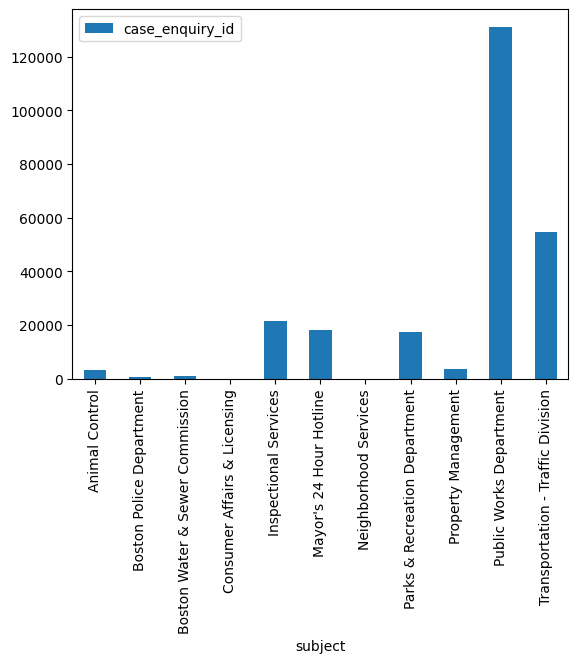

In [147]:
#or visualizing as a histogram
boston311[['subject','case_enquiry_id']].groupby(by = ['subject']).count().plot.bar()

### Task 1. Count the number of neighborhoods (distinct names in "neighborhood" column), and visualize the number of complaints by neighborhood as a bar plot

In [148]:
# Count the number of neighborhoods.
neighborhood_count = boston311['neighborhood'].nunique()
print(f'Total number of neighborhoods: {neighborhood_count}')

Total number of neighborhoods: 24


In [149]:
import matplotlib.pyplot as plt

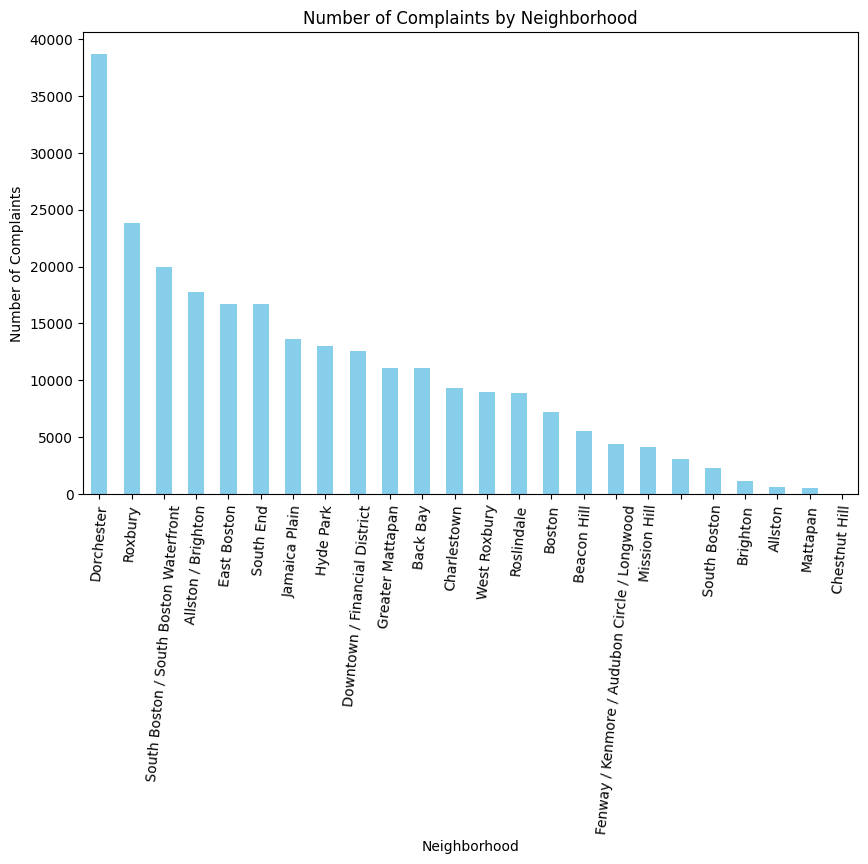

In [150]:
#Group complaints by neighborhood and create a bar plot

neighborhood_complaints = boston311['neighborhood'].value_counts()

plt.figure(figsize=(10, 6))
neighborhood_complaints.plot(kind='bar', color='skyblue')
plt.title('Number of Complaints by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=85)
plt.show()

## Dataset 2. Real-estate data sales (XLS)

The data contains information on all the residential real estate sold in NYC, including address of the house/unit, its size, age, time of sale and of course the price

In [151]:
#the data is split by year and borough. Take Brooklyn in 2015
year=2015; boro='brooklyn'

In [152]:
fname=str(year)+'_'+boro+'.xls'

In [153]:
url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/'+str(year)+\
                                                                                       '/'+fname
# alternative URL
# url = '2015_brooklyn.xls'

In [154]:
re_sales = pd.read_excel(url)

In [155]:
re_sales.head()

,"BROOKLYN ANNUALIZE SALE FOR 2015. (All Sales From January 1, 2015 - December 31, 2015)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 3/31/2016. Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name 4/1/16. Descriptive Data as...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31 00:00:00


We'll need to skip first 4 lines to make it pandas-frienly

And also consider alternative data ingestion approach: download to the local folder first and then upload from local drive

In [156]:
import urllib #use urllib mobule for web requests
dataDir='' #local data folder to use
urllib.request.urlretrieve(url,dataDir+fname) #upload from local, data have problem, at least people can read it

('2015_brooklyn.xls', <http.client.HTTPMessage at 0x78b89fdd1060>)

In [157]:
#now upload the data, also skipping first 4 rows
re_sales = pd.read_excel(dataDir+fname,skiprows=4)

In [158]:
re_sales.head() #now the dataframe looks reasonable

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


In [159]:
re_sales.columns #list of the columns to access the metadata

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

In [160]:
#notice that field names contain an artifact from the original data represenation - end of line symbol '\n'
#this way we won't be able to access the fields as before using "." syntax, but we can still use "[]" syntax like

In [161]:
re_sales['SALE PRICE\n'].sum() #this will be the total sales volume

19990077327

In [162]:
re_sales.describe() #statistics for numeric columns

,BOROUGH\n,BLOCK\n,LOT\n,ZIP CODE\n,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,SALE PRICE\n
count,25362.0,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,2.536200e+04
mean,3.0,4207.714534,281.084418,11217.017270,2.376981,0.185474,2.603817,2238.399456,2878.065649,1774.995584,1.699077,7.881901e+05
std,0.0,2649.487442,492.384071,186.770716,7.803233,2.711002,8.286863,6372.188724,10178.063689,542.988555,0.944152,3.198035e+06
min,3.0,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,3.0,1768.000000,21.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1910.000000,1.000000,0.000000e+00
50%,3.0,4149.000000,46.000000,11219.000000,1.000000,0.000000,1.000000,1900.000000,1744.500000,1929.000000,1.000000,3.300000e+05
75%,3.0,6540.000000,103.000000,11231.000000,2.000000,0.000000,2.000000,2500.000000,2880.000000,1957.000000,2.000000,8.130000e+05
max,3.0,8955.000000,9033.000000,11249.000000,338.000000,355.000000,355.000000,293000.000000,366000.000000,2016.000000,4.000000,1.690000e+08


It also helps us spot some issues with the data - zero min's for zip code, size, year (also average age of 1774 does not look right and is likely affected by that), sale price show that some records are unreliable

Also lets introduce some descriptive analysis, e.g. total price and average price per unit

In [163]:
re_sales['SALE PRICE\n'][re_sales['SALE PRICE\n']>0].mean() #skip 0s as one good cleaning skill, so it is the average price per unit

1236091.8455973286

In [164]:
re_sales['SALE PRICE\n'].mean() #average price per unit

788190.100425834

In [165]:
#or visualizing an average sale price per zip code
#ideally this would make more sense as a spatial visualization on the map. but let us get to that later
#we'll use groupby here. Note that groupby will apply mean to all the fields other than the ones used for grouping (by)
#so we first filter the datarame to keep only two columns - 'ZIP CODE\n','SALE PRICE\n' - first for grouping, second for taking averages
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean()

,SALE PRICE\n
ZIP CODE,
0,4.892857e+05
11201,1.618065e+06
11203,4.190376e+05
11204,4.908219e+05
11205,7.062129e+05
11206,1.213060e+06
11207,4.006299e+05
11208,3.979557e+05
11209,5.333751e+05


<Axes: xlabel='ZIP CODE\n'>

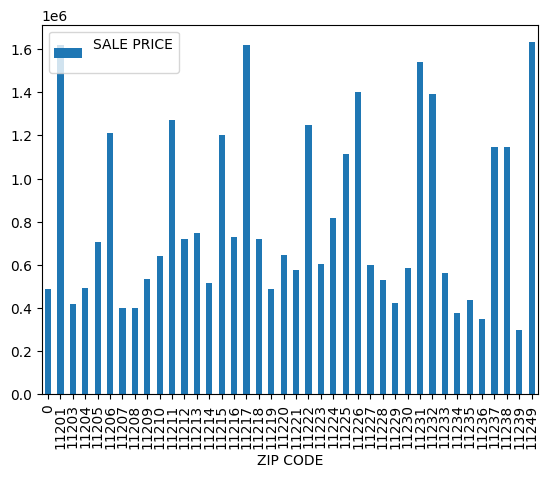

In [166]:
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean().plot.bar()

But price per unit is not always the best characteristics of the market as units might be quite different, ranging from small studios to large houses. Besides particularly expensive ones may affect the averages. Median price is often used along with the price per square foot. In the next excercise, we'll try to compute an average price per square foot. For now let's skip the technical issue like missing/zero data and just plow ahead. In the next lab we'll talk about how those should addressed.

### Task 2.
Quantify the average price per square foot per zip code. Visualize result as a bar plot. Which zip codes are the three most expensive ones?

Hints: First, use "group_by" to create an aggregate with cumulative price and sq foot size and then add a new field through assignment dividing one by the other.

You can use sort_values to order dataframe by price per zip code and see the top three zip codes.

Not mandatory, but if you want python to give you a specific list of the top three zip codes, you can use .iloc to slice it and get the index converting it to a list. But then make sure to ignore zip codes with infinite prices (likely due to zero house sizes).

In [167]:
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean()

,SALE PRICE\n
ZIP CODE,
0,4.892857e+05
11201,1.618065e+06
11203,4.190376e+05
11204,4.908219e+05
11205,7.062129e+05
11206,1.213060e+06
11207,4.006299e+05
11208,3.979557e+05
11209,5.333751e+05


In [168]:
# First, we'll clean the data and calculate the price per square foot
re_sales_cleaned = re_sales.copy()  # Make a copy of the DataFrame to avoid modifying the original data
re_sales_cleaned = re_sales_cleaned[(re_sales_cleaned['SALE PRICE\n'] > 0) & (re_sales_cleaned['GROSS SQUARE FEET\n'] > 0)]
re_sales_cleaned['PRICE PER SQFT'] = re_sales_cleaned['SALE PRICE\n'] / re_sales_cleaned['GROSS SQUARE FEET\n']



<ipython-input-168-a0779c8dec85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_sales_cleaned['PRICE PER SQFT'] = re_sales_cleaned['SALE PRICE\n'] / re_sales_cleaned['GROSS SQUARE FEET\n']


In [169]:
# Filter out rows with missing or zero values in 'SALE PRICE' or 'GROSS SQUARE FEET'
# Create a copy to avoid the SettingWithCopyWarning
re_sales_cleaned = re_sales_cleaned.copy()

In [170]:
# Calculate price per square foot
re_sales_cleaned.loc[:, 'PRICE PER SQFT'] = re_sales_cleaned['SALE PRICE\n'] / re_sales_cleaned['GROSS SQUARE FEET\n']

In [171]:
# Group by zip code and calculate the average price per square foot
avg_price_per_sqft = re_sales_cleaned[['ZIP CODE\n', 'PRICE PER SQFT']].groupby(by=['ZIP CODE\n']).mean().reset_index()

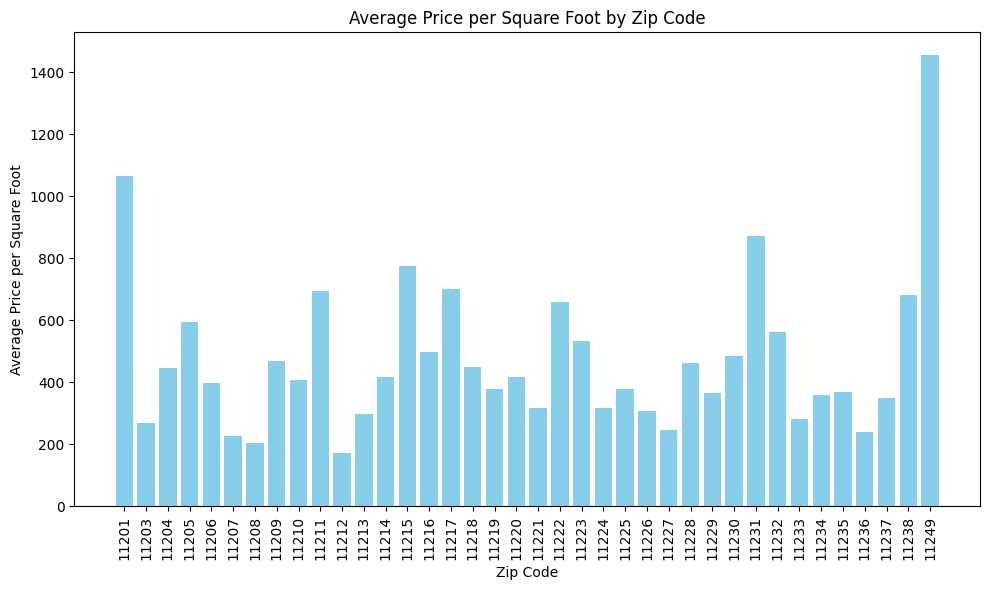

In [172]:
# Convert 'ZIP CODE\n' to strings (if not already)
avg_price_per_sqft['ZIP CODE\n'] = avg_price_per_sqft['ZIP CODE\n'].astype(str)

# Sort the DataFrame by 'ZIP CODE\n'
avg_price_per_sqft = avg_price_per_sqft.sort_values(by='ZIP CODE\n')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_price_per_sqft['ZIP CODE\n'], avg_price_per_sqft['PRICE PER SQFT'], color='skyblue')
plt.title('Average Price per Square Foot by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Price per Square Foot')
plt.xticks(rotation=90)

plt.tight_layout()  # Ensure labels fit without overlapping
plt.show()

## Dataset 3. Street Pavement Rating

The New York City Department of Transportation is responsible for keeping the City's streets in good repair. The Agency performs ongoing assessment of New York City streets. Ratings are based on a scale from 1 to 10, and results are grouped in the following categories: Good (%) - ratings of 8 to 10, Fair (%) - ratings of 4 to 7, and Poor (%) - ratings of 1 to 3. Rating dates started from 1994 to 2019. This data will allow you to create a map.

GeoJSON is a JSON based format designed to represent the geographical features with their non-spatial attributes. Besides GeoJSON, shapefile is also a common format for geographical datasets. For more information, please check https://geojson.org/.

As JSON contains spatial information (in this case shapes of the streets) along with the data, we'll need a slightly different vehicle to load it. There is a module geopandas which we'll use below. In short its just like pandas, but having a special column "geometry" which is meant to contain spatial info

In [173]:
import geopandas as gpd
url = 'https://data.cityofnewyork.us/api/geospatial/2cav-chmn?method=export&format=GeoJSON'
# alternative URL
# url = 'https://github.com/CUSP2020PUI/Data/raw/master/Street%20Pavement%20Rating.geojson'
rating = gpd.read_file(url)

In [174]:
rating.shape #shape of the dataframe - first is the number of records (streets)

(81209, 13)

In [175]:
rating.head() #lets preview the data

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date,geometry
0,0,0,969,609.854259468,0,5,L,2020,589.0,33.08,FAIR,2020-01-24,"MULTILINESTRING ((-74.21215 40.51645, -74.2119..."
1,0,0,983,257.932161624,0,9,NaN,2020,258.0,30.0,GOOD,2021-05-20,"MULTILINESTRING ((-74.20972 40.51892, -74.2106..."
2,0,0,999,379.637985455,0,3,NaN,2020,232.0,30.0,POOR,2019-10-01,"MULTILINESTRING ((-74.20649 40.51486, -74.2054..."
3,0,0,1018,50.2891638427,0,8,L,2020,75.0,34.58,GOOD,2019-10-01,"MULTILINESTRING ((-74.20882 40.51931, -74.2087..."
4,0,0,1050,786.400025432,0,5,NaN,2020,891.0,30.0,FAIR,2020-01-13,"MULTILINESTRING ((-74.20584 40.51791, -74.2047..."


In [176]:
rating.iloc[:,:-1].describe() #note that we can't apply describe to a geometry column so need to exclude it first

<ipython-input-176-63595e813747>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rating.iloc[:,:-1].describe() #note that we can't apply describe to a geometry column so need to exclude it first


,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date
count,81209,81209,81209,81209,81209,81209,57698,81209,81209,81209,81209,73032
unique,2,2,81209,41590,2,11,3,31,1588,834,4,2106
top,0,0,969,260.499520153,0,8,L,2021,246.0,30.0,GOOD,2021-08-12 00:00:00
freq,71660,68374,1,359,73352,25137,40816,24035,846,26402,46857,542
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-11 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-16 00:00:00


In [177]:
#Notice that this time describe look differently. This is because the values in the dataframe are not treated as numbers but categorical values

In [178]:
#if we want them as numbers we need to perform type convertion
rating['length'] = pd.to_numeric(rating['length'], errors='coerce').astype('int')
rating['length'].describe()

count    81209.000000
mean       382.526321
std        250.159451
min          6.000000
25%        238.000000
50%        288.000000
75%        505.000000
max       6795.000000
Name: length, dtype: float64

In [179]:
#now let's count how many streets are in either condition based on 'rating_word'
rating['rating_word'].value_counts()

GOOD    46857
FAIR    24893
NR       8177
POOR     1282
Name: rating_word, dtype: int64

In [180]:
rating['length'].sum() #counting the length of good and bad street

31064580

In [181]:
#now let's count the cumulative length of those in either condition based on 'rating_word'
rating[['rating_word','length']].groupby(by=['rating_word']).sum()

,length
rating_word,
FAIR,9381754
GOOD,18353318
NR,2812315
POOR,517193


<Axes: ylabel='length'>

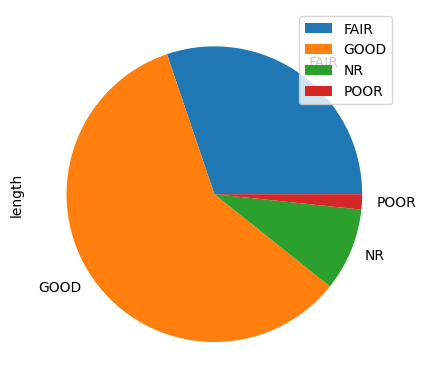

In [182]:
#and visualize overall conditions of the roads using piechart
rating[['rating_word','length']].groupby(by=['rating_word']).sum().plot.pie(y='length')

And let's use the true power of geopandas - visualize the streetmap

<Axes: >

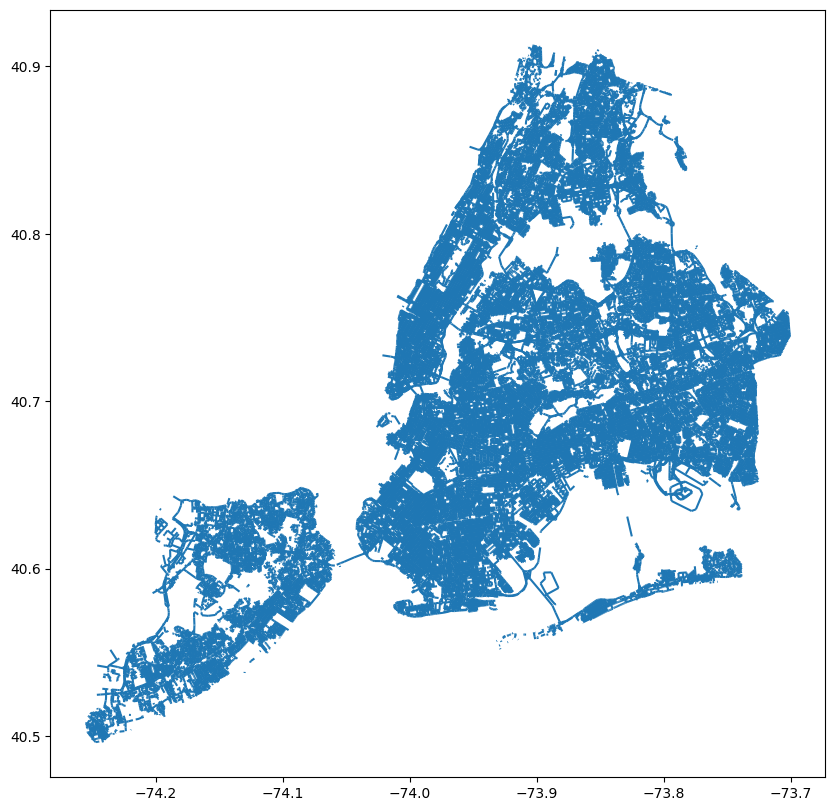

In [183]:
rating.plot(column=None, figsize=(10,10)) #first just the shapes of the streetmap without any information

<Axes: >

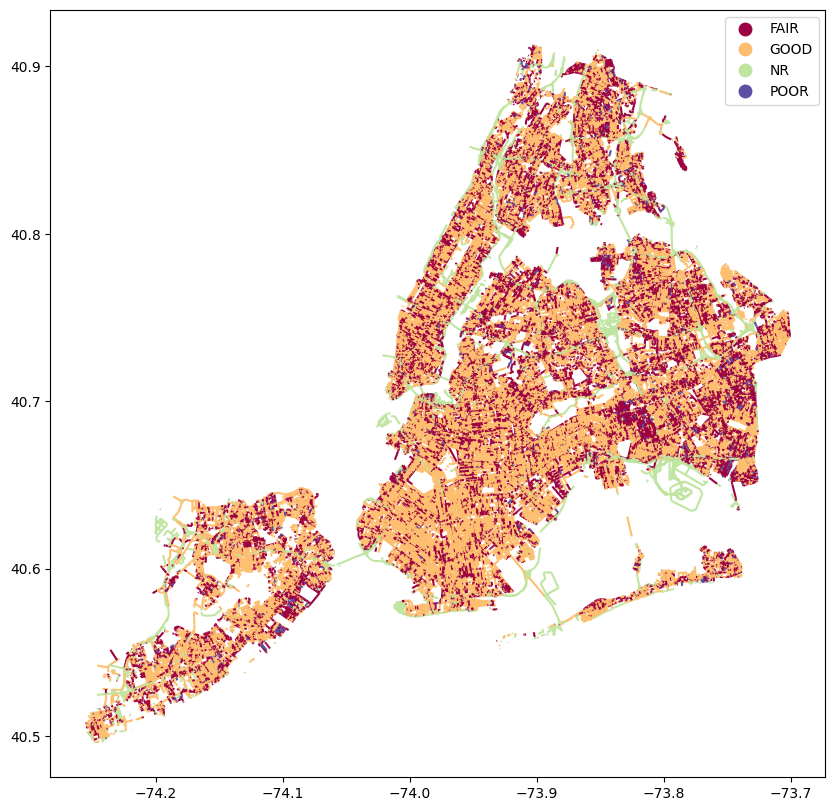

In [184]:
#and now visualize the streets according to their status
rating.plot(column='rating_word',cmap='Spectral',figsize=(10,10),legend=True)

### Task 3.
Visualize only the poorly maintained roads so we can zoom into those that need particular attention.

HINT: Filter the dataframe first using slicing by an appropriate condition on rating.rating_word

In [185]:
# poorly_maintained_roads = rating[rating['rating_word'] == 'POOR']

# # Visualize the streets according to their status
# fig, ax = plt.subplots(figsize=(10,10))
# rating.plot(column='rating_word', cmap='Spectral', ax=ax, legend=True)

# # Create a custom legend for Poor rating
# colors = {'POOR': 'red'}
# handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
#                       markersize=10, markerfacecolor=color)
#            for label, color in colors.items()]
# ax.legend(handles=handles, title='Street Rating', loc='upper right')

# plt.show()

In [186]:
#rating.head()

In [187]:
#poorly_maintained_roads = rating[rating['rating_word'] == 'POOR']

In [188]:
#poorly_maintained_roads.head()

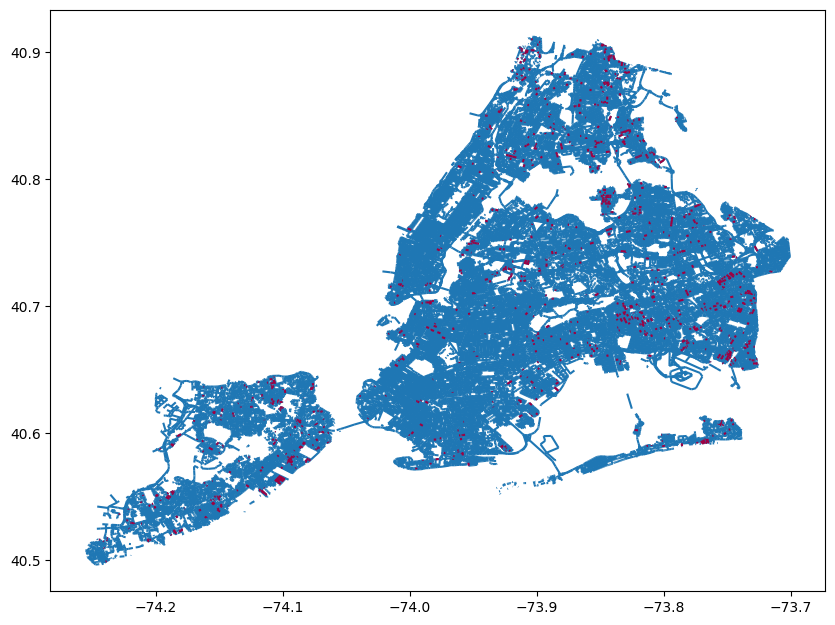

In [189]:
# Filter the dataframe for poorly maintained roads
poorly_maintained_roads = rating[rating['rating_word'] == 'POOR']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the street shapes without information
rating.plot(column=None, ax=ax)

# Plot the poorly maintained roads on top
poorly_maintained_roads.plot(column='rating_word', cmap='Spectral', ax=ax, legend=False)

# Set the aspect ratio
ax.set_aspect(1)

plt.show()

### Dataset 4. COVID-19 Data by ZIP Code

This dataset includes confirmed case rates, case counts, death rates, death counts, and the percent of people tested with a positive result since March. Follwing download links refer to the dataset uploaded on Sep 1st. Dataset is provided by NYC health, please check https://www1.nyc.gov/site/doh/covid/covid-19-data.page for more information and other COVID19 related datasets.

### Task 4:
    
    a) Aggregate dataset by Borough, calculate total cases amount in each Borough, and then visualize as a barplot
    
    b) Calculate borough-wise positive case percentage within all the tests administered within the borough (positivity rate among the tests), visualize as a barplot
    
    c) Calculate borough-wise positive case percentage within the borough population (%% of population tested positive), and visualize as barplot.
    
    Notice that both quantities b) and c) matter as otherwise the percentage of people tested positive might depend on the testing availability and practice which are not necessary consistent accross boroughs.


Hint: The column for case amount is “COVID_CASE_COUNT". Try groupby function in pandas to get total cases and tests by borough. Positive case percentage is ‘100*COVID_CASE_COUNT'/'TOTAL_COVID_TESTS'. To calculate positive case percentage, you might first need a borough level dataframe.

In [190]:
url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/7953c97d1e58bbed9934ea04affb12ca74d9c0fb/data-by-modzcta.csv'
df = pd.read_csv(url)

In [191]:
df.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,441,1871.58,23563.03,26,110.34,6.50,6786
1,10002,Chinatown/Lower East Side,Manhattan,1335,1739.29,76755.41,161,209.76,7.66,17439
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,543,1009.26,53801.62,35,65.05,3.53,15381
3,10004,Financial District,Manhattan,40,1095.71,3650.61,1,27.39,4.84,827
4,10005,Financial District,Manhattan,96,1143.39,8396.11,2,23.82,4.53,2117


Task a: Total Cases by Borough

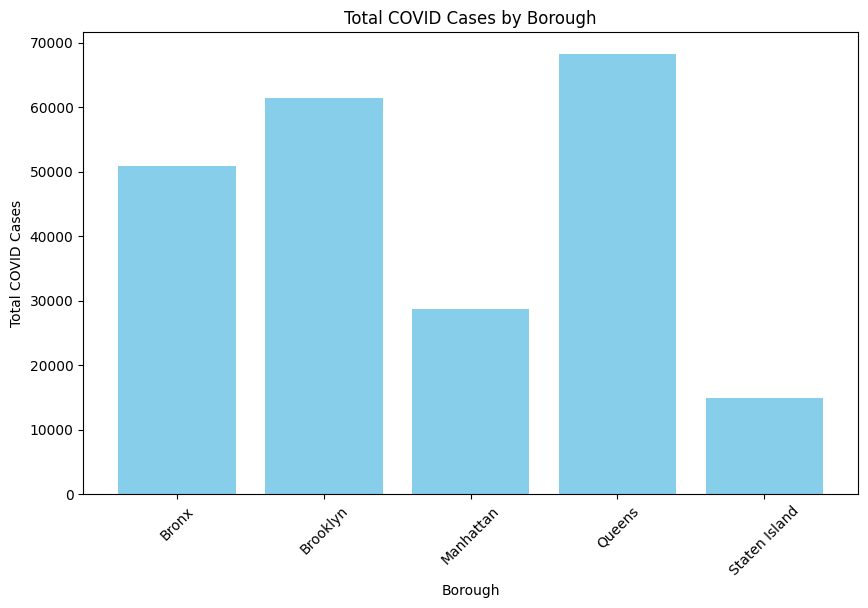

In [192]:
# Group by borough and calculate the total cases
borough_total_cases = df.groupby('BOROUGH_GROUP')['COVID_CASE_COUNT'].sum().reset_index()

# Visualize as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(borough_total_cases['BOROUGH_GROUP'], borough_total_cases['COVID_CASE_COUNT'], color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Total COVID Cases')
plt.title('Total COVID Cases by Borough')
plt.xticks(rotation=45)
plt.show()

Task b: Positivity Rate Among Tests

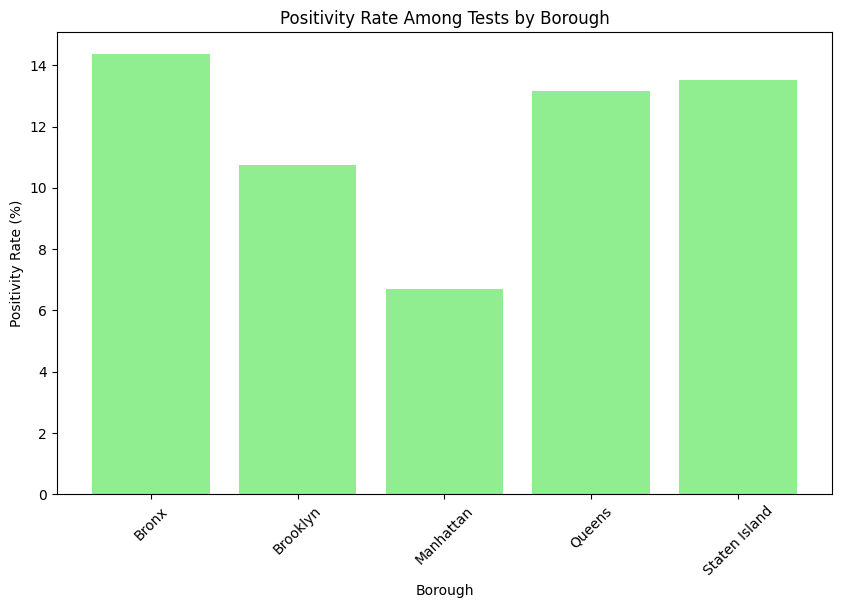

In [193]:
# Group by borough and calculate the total cases and total tests
borough_total = df.groupby('BOROUGH_GROUP')[['COVID_CASE_COUNT', 'TOTAL_COVID_TESTS']].sum().reset_index()

# Calculate the positivity rate
borough_total['Positivity Rate (%)'] = (borough_total['COVID_CASE_COUNT'] / borough_total['TOTAL_COVID_TESTS']) * 100

# Visualize as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(borough_total['BOROUGH_GROUP'], borough_total['Positivity Rate (%)'], color='lightgreen')
plt.xlabel('Borough')
plt.ylabel('Positivity Rate (%)')
plt.title('Positivity Rate Among Tests by Borough')
plt.xticks(rotation=45)
plt.show()

Task c: Positivity Rate Within Borough Population

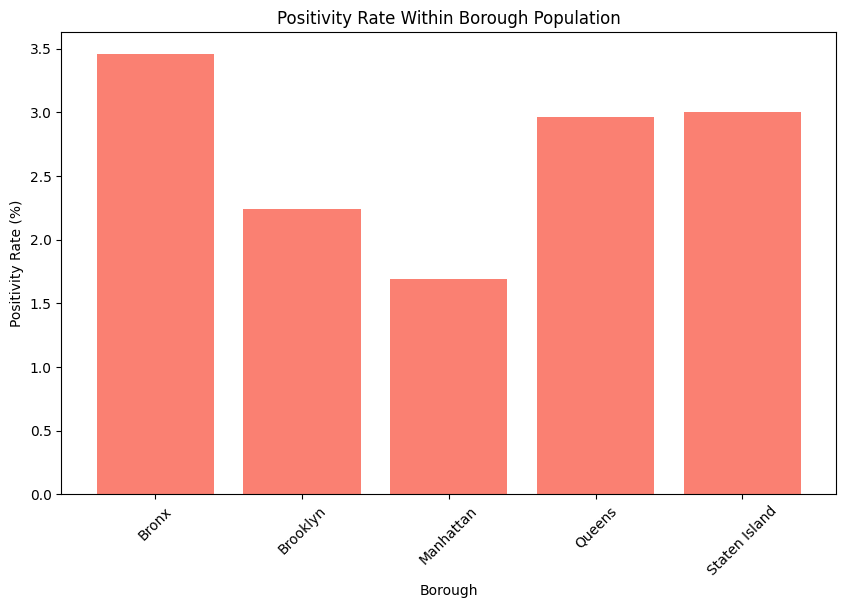

In [194]:
population_data = {
    'BOROUGH_GROUP': ['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island'],
    'POPULATION': [1694251, 2736074, 1472655, 2300753, 495747]
}

# Create the population DataFrame
population_df = pd.DataFrame(population_data)

# Merge the population data with the COVID data
borough_data = df.groupby('BOROUGH_GROUP')[['COVID_CASE_COUNT', 'TOTAL_COVID_TESTS']].sum().reset_index()
borough_data = pd.merge(borough_data, population_df, on='BOROUGH_GROUP')

# Calculate the positivity rate within the borough population
borough_data['Positivity Rate (%)'] = (borough_data['COVID_CASE_COUNT'] / borough_data['POPULATION']) * 100

# Visualize as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(borough_data['BOROUGH_GROUP'], borough_data['Positivity Rate (%)'], color='salmon')
plt.xlabel('Borough')
plt.ylabel('Positivity Rate (%)')
plt.title('Positivity Rate Within Borough Population')
plt.xticks(rotation=45)
plt.show()